In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_excel("cs-movavg.xls")

In [4]:
data

,Date,Price,10-day SMA,Smoothing Constant 2/(10 + 1),10-day EMA
0,2010-03-24,22.2734,NaN,NaN,NaN
1,2010-03-25,22.1940,NaN,NaN,NaN
2,2010-03-26,22.0847,NaN,NaN,NaN
3,2010-03-29,22.1741,NaN,NaN,NaN
4,2010-03-30,22.1840,NaN,NaN,NaN
5,2010-03-31,22.1344,NaN,NaN,NaN
6,2010-04-01,22.2337,NaN,NaN,NaN
7,2010-04-05,22.4323,NaN,NaN,NaN
8,2010-04-06,22.2436,NaN,NaN,NaN
9,2010-04-07,22.2933,NaN,NaN,NaN


In [5]:
import datetime
import time

In [6]:
def RSI(data, column="Price", period=14):
    # Wilder's RSI
    close = data[column]
    delta = close.diff() 
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0
    
    # Calculate the exponential moving averages (EWMA)
    roll_up = up.ewm(com=period - 1, adjust=False).mean()
    roll_down = down.ewm(com=period - 1, adjust=False).mean().abs()
    
    # Calculate RS based on exponential moving average (EWMA)
    rs = roll_up / roll_down   # relative strength =  average gain/average loss

    rsi = 100-(100/(1+rs))
    data['RSI'] = rsi
    
    return data

In [7]:
RSI(data).head(29)

,Date,Price,10-day SMA,Smoothing Constant 2/(10 + 1),10-day EMA,RSI
0,2010-03-24,22.2734,NaN,NaN,NaN,NaN
1,2010-03-25,22.1940,NaN,NaN,NaN,0.000000
2,2010-03-26,22.0847,NaN,NaN,NaN,0.000000
3,2010-03-29,22.1741,NaN,NaN,NaN,7.778213
4,2010-03-30,22.1840,NaN,NaN,NaN,8.625803
5,2010-03-31,22.1344,NaN,NaN,NaN,8.218269
6,2010-04-01,22.2337,NaN,NaN,NaN,16.703137
7,2010-04-05,22.4323,NaN,NaN,NaN,30.534705
8,2010-04-06,22.2436,NaN,NaN,NaN,26.100036
9,2010-04-07,22.2933,NaN,NaN,NaN,29.023846


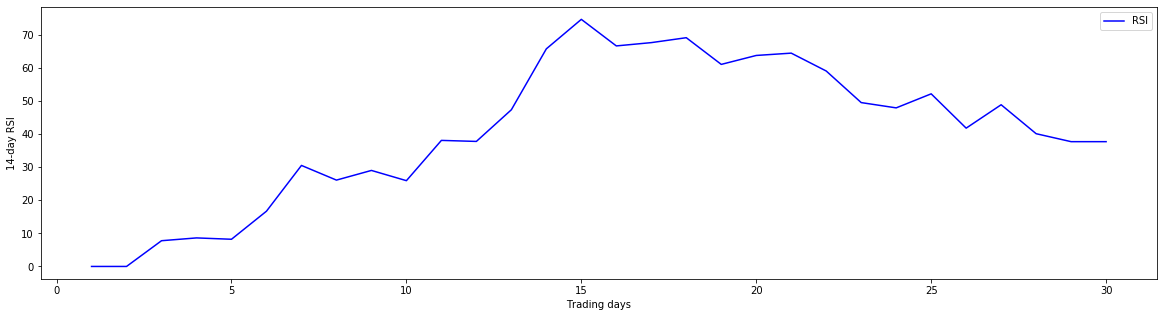

In [8]:
fig,ax=plt.subplots(figsize=(20,5))
data.RSI.plot(ax=ax, label='RSI', legend=True, color='b');
ax.set_xlabel('Trading days'); ax.set_ylabel('14-day RSI');